
# ============================================================
# 🍦 GELATO MÁGICO - SISTEMA DE PREVISÃO DE VENDAS
# ============================================================


📦 IMPORTAÇÃO DAS BIBLIOTECAS NECESSÁRIAS
-----------------------------------------

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')  # Ignora avisos para manter a saída limpa

# ============================================================
# PASSO 1: CRIAÇÃO DOS DADOS SIMULADOS
# ============================================================

In [23]:
def criar_dados_gelato():
    """
    Cria um dataset simulando vendas de gelato baseadas na temperatura
    Returns:
        DataFrame com colunas: temperatura, vendas
    """

    print("🔄 Criando dados simulados de vendas de gelato...")

    # Definindo uma semente para reprodutibilidade
    np.random.seed(42)

    # Criando 100 temperaturas aleatórias entre 15 e 40 graus
    temperaturas = np.random.uniform(15, 40, 100)

    # Criando vendas baseadas na temperatura com uma relação linear + ruído
    # Fórmula: vendas = 5 * temperatura + 50 + ruído aleatório
    vendas = 5 * temperaturas + 50 + np.random.normal(0, 20, 100)

    # Arredondando as vendas para números inteiros
    vendas = np.round(vendas).astype(int)

    # Garantindo que não haja vendas negativas
    vendas = np.maximum(vendas, 0)

    # Criando DataFrame com os nomes das colunas em português
    dados = pd.DataFrame({
        'temperatura': temperaturas,
        'vendas': vendas
    })

    return dados


# ============================================================
# PASSO 2: FUNÇÃO PARA CARREGAR OS DADOS
# ============================================================


In [ ]:
def carregar_dados():
    """
    Carrega os dados do dataset de gelato
    Se o arquivo não existir, cria dados simulados
    """

    print("\n📂 CARREGANDO DADOS...")
    print("-" * 40)

    try:
        # Tentando carregar do arquivo CSV
        dados = pd.read_csv('gelato_data.csv')
        print("✅ Arquivo encontrado!")

    except FileNotFoundError:
        # Se não encontrar o arquivo, cria dados simulados
        print("⚠️ Arquivo não encontrado. Criando dados simulados...")
        dados = criar_dados_gelato()

        # Salvando os dados criados para uso futuro
        dados.to_csv('gelato_data.csv', index=False)
        print("💾 Dados salvos em 'gelato_data.csv'")

    return dados

# ============================================================
# PASSO 3: ANÁLISE EXPLORATÓRIA DOS DADOS
# ============================================================

In [24]:
def analisar_dados(dados):
    """
    Realiza análise exploratória básica dos dados
    """

    print(f"\n📊 Total de registros: {len(dados)}")
    print(f"📋 Colunas: {list(dados.columns)}")

    print("\n📋 Primeiros registros:")
    print(dados.head())

    print("\n📊 Estatísticas básicas:")
    print(dados.describe())

    # Verificando se há valores nulos
    print("\n🔍 Valores nulos:")
    print(dados.isnull().sum())

    # Calculando correlação entre temperatura e vendas
    correlacao = dados['temperatura'].corr(dados['vendas'])
    print(f"\n📈 Correlação entre temperatura e vendas: {correlacao:.3f}")

# ============================================================
# PASSO 4: VISUALIZAÇÃO DOS DADOS
# ============================================================

In [25]:

def visualizar_dados(dados):
    """
    Cria visualizações dos dados
    """

    print("\n🎨 Gerando visualizações...")

    # Criando uma figura com 2 subplots
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))

    # Gráfico 1: Dispersão (temperatura x vendas)
    axes[0].scatter(dados['temperatura'], dados['vendas'], alpha=0.6, color='orange', edgecolors='darkorange')
    axes[0].set_xlabel('Temperatura (°C)', fontsize=12)
    axes[0].set_ylabel('Vendas', fontsize=12)
    axes[0].set_title('Relação Temperatura vs Vendas', fontsize=14, fontweight='bold')
    axes[0].grid(True, alpha=0.3)

    # Gráfico 2: Histograma das vendas
    axes[1].hist(dados['vendas'], bins=20, color='skyblue', edgecolor='black', alpha=0.7)
    axes[1].set_xlabel('Vendas', fontsize=12)
    axes[1].set_ylabel('Frequência', fontsize=12)
    axes[1].set_title('Distribuição das Vendas', fontsize=14, fontweight='bold')
    axes[1].grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

    return fig

# ============================================================
# PASSO 5: PREPARAÇÃO DOS DADOS PARA MODELAGEM
# ============================================================

In [26]:

def preparar_dados(dados):
    """
    Prepara os dados para treinamento do modelo
    """

    print("\n🛠️ PREPARANDO DADOS PARA TREINAMENTO...")

    # Separando features (X) e target (y)
    X = dados[['temperatura']]  # Feature matrix (precisa ser 2D para o sklearn)
    y = dados['vendas']          # Target vector

    print(f"📊 Shape dos dados de treino:")
    print(f"   - Features (X): {X.shape}")
    print(f"   - Target (y): {y.shape}")

    # Dividindo em treino e teste (80% treino, 20% teste)
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )

    print(f"\n📊 Divisão treino/teste:")
    print(f"   - Treino: {len(X_train)} amostras")
    print(f"   - Teste: {len(X_test)} amostras")

    return X_train, X_test, y_train, y_test

# ============================================================
# PASSO 6: TREINAMENTO DO MODELO
# ============================================================

In [27]:
def treinar_modelo(X_train, y_train):
    """
    Treina o modelo de regressão linear
    """

    print("\n🤖 TREINANDO MODELO...")

    # Criando e treinando o modelo
    modelo = LinearRegression()
    modelo.fit(X_train, y_train)

    # Extraindo os coeficientes do modelo
    coeficiente = modelo.coef_[0]
    intercepto = modelo.intercept_

    print(f"\n📐 Equação do modelo:")
    print(f"   Vendas = {coeficiente:.2f} × Temperatura + {intercepto:.2f}")

    return modelo

# ============================================================
# PASSO 7: AVALIAÇÃO DO MODELO
# ============================================================

In [28]:
def avaliar_modelo(modelo, X_test, y_test):
    """
    Avalia o desempenho do modelo nos dados de teste
    """

    print("\n📊 AVALIANDO MODELO...")

    # Fazendo previsões
    y_pred = modelo.predict(X_test)

    # Calculando métricas de avaliação
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    print(f"\n📈 Métricas de desempenho:")
    print(f"   - MAE (Erro Absoluto Médio): {mae:.2f}")
    print(f"   - MSE (Erro Quadrático Médio): {mse:.2f}")
    print(f"   - RMSE (Raiz do Erro Quadrático Médio): {rmse:.2f}")
    print(f"   - R² Score: {r2:.3f}")

    return y_pred


# ============================================================
# PASSO 8: VISUALIZAÇÃO DOS RESULTADOS
# ============================================================

In [29]:
def visualizar_resultados(modelo, X_train, y_train, X_test, y_test, y_pred):
    """
    Cria visualizações dos resultados do modelo
    """

    print("\n🎨 Visualizando resultados...")

    fig, axes = plt.subplots(1, 2, figsize=(15, 5))

    # Gráfico 1: Dados reais vs Previsões
    axes[0].scatter(X_test, y_test, color='blue', alpha=0.6, label='Dados Reais', edgecolors='darkblue')
    axes[0].scatter(X_test, y_pred, color='red', alpha=0.6, label='Previsões', edgecolors='darkred')
    axes[0].set_xlabel('Temperatura (°C)', fontsize=12)
    axes[0].set_ylabel('Vendas', fontsize=12)
    axes[0].set_title('Dados Reais vs Previsões', fontsize=14, fontweight='bold')
    axes[0].legend()
    axes[0].grid(True, alpha=0.3)

    # Gráfico 2: Linha de regressão
    axes[1].scatter(X_train, y_train, color='lightblue', alpha=0.5, label='Treino', edgecolors='blue')
    axes[1].scatter(X_test, y_test, color='orange', alpha=0.5, label='Teste', edgecolors='darkorange')

    # Plotando a linha de regressão
    X_line = np.linspace(15, 40, 100).reshape(-1, 1)
    y_line = modelo.predict(X_line)
    axes[1].plot(X_line, y_line, color='red', linewidth=2, label='Linha de Regressão')

    axes[1].set_xlabel('Temperatura (°C)', fontsize=12)
    axes[1].set_ylabel('Vendas', fontsize=12)
    axes[1].set_title('Modelo de Regressão Linear', fontsize=14, fontweight='bold')
    axes[1].legend()
    axes[1].grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

    return fig

# ============================================================
# PASSO 9: FUNÇÃO DE PREVISÃO
# ============================================================


In [30]:
def fazer_previsao(modelo, temperatura):
    """
    Faz previsão de vendas para uma dada temperatura
    """
    try:
        temperatura_float = float(temperatura)
        previsao = modelo.predict([[temperatura_float]])[0]
        previsao = max(0, round(previsao))  # Garantindo previsão não negativa
        return previsao
    except ValueError:
        print("❌ Erro: Por favor, insira um número válido")
        return None


# ============================================================
# PASSO 10: FUNÇÃO PRINCIPAL
# ============================================================

In [31]:
def main():
    """
    Função principal que executa todo o pipeline
    """

    print("=" * 60)
    print("🍦 GELATO MÁGICO - SISTEMA DE PREVISÃO DE VENDAS")
    print("=" * 60)

    print("\n🚀 Iniciando o pipeline de Machine Learning...")

    # Carregando dados
    dados = carregar_dados()

    # Análise exploratória
    analisar_dados(dados)

    # Visualização inicial
    visualizar_dados(dados)

    # Preparação dos dados
    X_train, X_test, y_train, y_test = preparar_dados(dados)

    # Treinamento
    modelo = treinar_modelo(X_train, y_train)

    # Avaliação
    y_pred = avaliar_modelo(modelo, X_test, y_test)

    # Visualização dos resultados
    visualizar_resultados(modelo, X_train, y_train, X_test, y_test, y_pred)

    print("\n✅ Pipeline concluído com sucesso!")

    # Exemplo de previsão
    print("\n🔮 EXEMPLO DE PREVISÃO:")
    print("-" * 30)

    temperaturas_exemplo = [20, 25, 30, 35]
    for temp in temperaturas_exemplo:
        previsao = fazer_previsao(modelo, temp)
        print(f"🌡️  Temperatura: {temp}°C → 🍦 Vendas previstas: {previsao} unidades")















# ============================================================
# EXECUÇÃO DO PROGRAMA
# ============================================================

🍦 GELATO MÁGICO - SISTEMA DE PREVISÃO DE VENDAS

🚀 Iniciando o pipeline de Machine Learning...

📂 CARREGANDO DADOS...
----------------------------------------
✅ Arquivo encontrado!

📊 Total de registros: 100
📋 Colunas: ['temperatura', 'vendas']

📋 Primeiros registros:
   temperatura  vendas
0    24.363503     174
1    38.767858     238
2    33.299849     218
3    29.966462     160
4    18.900466     140

📊 Estatísticas básicas:
       temperatura      vendas
count   100.000000  100.000000
mean     26.754519  183.750000
std       7.437235   38.891555
min      15.138053  110.000000
25%      19.830019  152.000000
50%      26.603561  180.500000
75%      33.255078  215.000000
max      39.672173  270.000000

🔍 Valores nulos:
temperatura    0
vendas         0
dtype: int64

📈 Correlação entre temperatura e vendas: 0.886

🎨 Gerando visualizações...


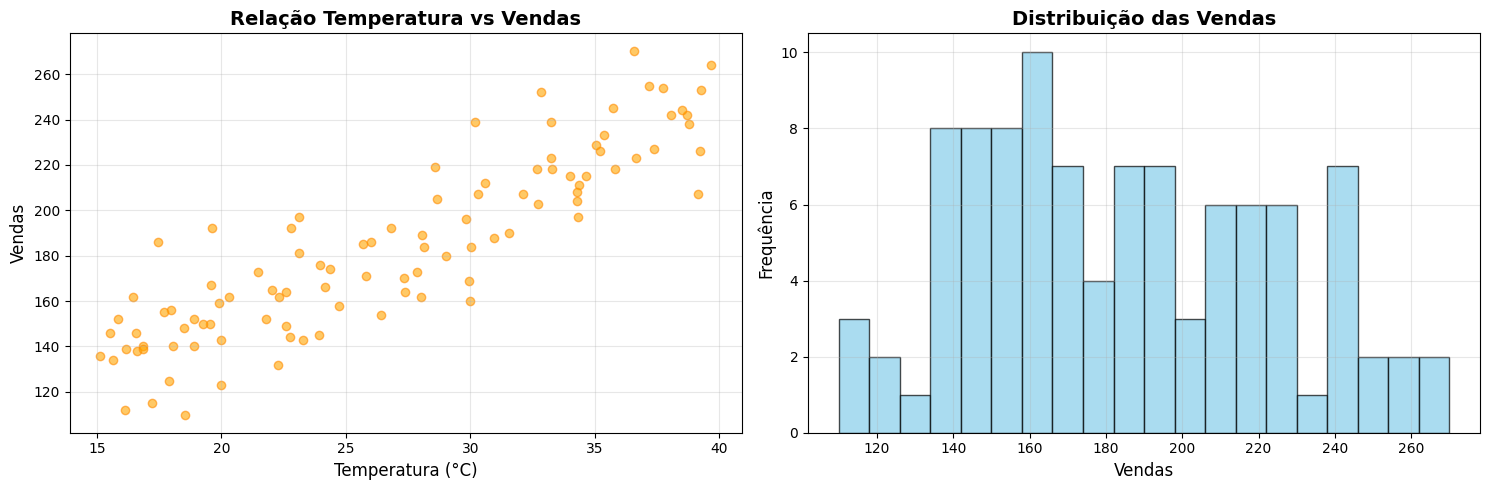


🛠️ PREPARANDO DADOS PARA TREINAMENTO...
📊 Shape dos dados de treino:
   - Features (X): (100, 1)
   - Target (y): (100,)

📊 Divisão treino/teste:
   - Treino: 80 amostras
   - Teste: 20 amostras

🤖 TREINANDO MODELO...

📐 Equação do modelo:
   Vendas = 4.68 × Temperatura + 57.67

📊 AVALIANDO MODELO...

📈 Métricas de desempenho:
   - MAE (Erro Absoluto Médio): 11.81
   - MSE (Erro Quadrático Médio): 260.73
   - RMSE (Raiz do Erro Quadrático Médio): 16.15
   - R² Score: 0.822

🎨 Visualizando resultados...


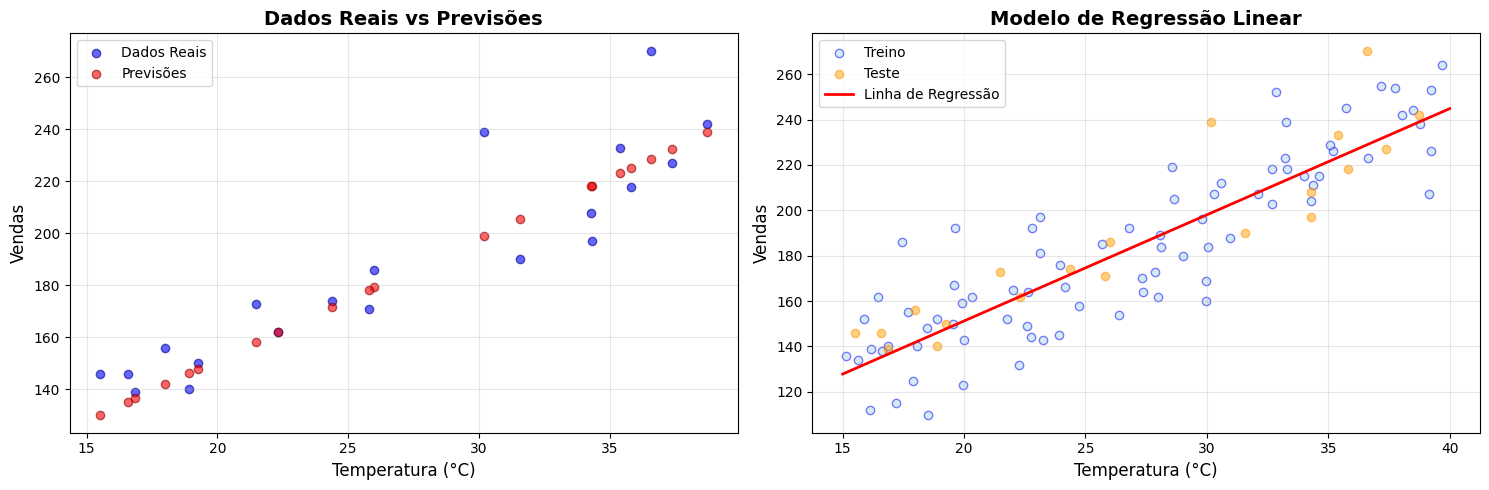


✅ Pipeline concluído com sucesso!

🔮 EXEMPLO DE PREVISÃO:
------------------------------
🌡️  Temperatura: 20°C → 🍦 Vendas previstas: 151 unidades
🌡️  Temperatura: 25°C → 🍦 Vendas previstas: 175 unidades
🌡️  Temperatura: 30°C → 🍦 Vendas previstas: 198 unidades
🌡️  Temperatura: 35°C → 🍦 Vendas previstas: 221 unidades


In [34]:
if __name__ == "__main__":
    main()